<class 'numpy.ndarray'>
[ 2.5  5.6  5.8 ... 11.7 15.   9.6]
[ 5.52  5.81  5.82 ... 11.59 11.99 11.93]


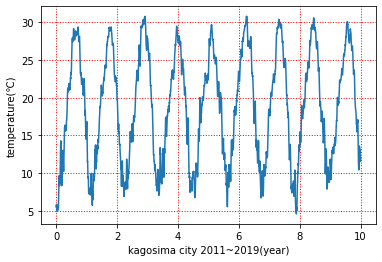

In [1]:
# 移動平均(気温)
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('平均気温のみ.txt')
print(type(data))
print(data)
x = np.linspace(0,10,3278)
num = 10
b = np.ones(num)/num
data2 = np.convolve(data,b,mode='vailed')
print(data2)
plt.xlabel('kagosima city 2011~2019(year)')
plt.ylabel('temperature(℃)')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.plot(x,data2)

plt.show()

In [ ]:
# 移動平均(降水量)
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('降水量.txt')
print(type(data))
print(data)
x = np.linspace(0,10,3296)
num = 10
b = np.ones(num)/num
data2 = np.convolve(data,b,mode='full')
print(data2)

plt.xlabel('kagosima city 2011~2019(year)')
plt.ylabel('Precipitation amount(mm)')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.plot(x,data2)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data.csv')
data2 = np.loadtxt('juyo-2021.csv')
df_kion = pd.DataFrame(data)
df_juyo = pd.DataFrame(data2)

df = pd.concat([df_juyo, df_kion], axis=1)
#相関係数を求める
corr = df.corr()


data_ave = []
data2_ave = []


data_ravf = [float(s) for s in data_rav]
data2_ravf = [float(s) for s in data2_rav]
# data_ravf = [float(s) for s in ]
# data2_ravf = [float(s) for s in ]

# 平均を求める範囲の変数
start = 0
end = 23

# for文は気温と電力の一時間ごとだとデータが多すぎてグラフが潰れてしまうので24時間(1日)ごとの平均にする
for i in range(365) :

    sum_data = np.sum( [data_ravf[start : end + 1]] )
    tmp = sum_data/24
    data_ave = np.append(data_ave,tmp)
    tmp = 0
    start = start + 24
    end = end + 24
#変数を初期化
start = 0
end = 23

for i in range(365) :

    sum_data2 = np.sum( [data2_ravf[start : end + 1]] )
    tmp = sum_data2/24
    data2_ave = np.append(data2_ave,tmp)
    tmp = 0
    start = start + 24
    end = end + 24


num = 2
b = np.ones(num)/num
data_con = np.convolve(data_ave,b,mode='full')
data2_con = np.convolve(data2_ave,b,mode='full')


plt.xlabel('Temperatures in Tokyo(℃)')
plt.ylabel('Tokyo Power Consumption(KWh)')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.scatter(data_ave,data2_ave)

print(corr)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
# 使用する電気使用量と気温のデータを読み込んでデータフレーム化する。
data = np.loadtxt("juyo-2021.csv")
df = pd.DataFrame(data)
data2 = np.loadtxt('data.csv')
df_Temperatures = pd.DataFrame(data2)

start = 0
end = 23
data_ave = []
data2_ave = []

for i in range(365) :

    sum_data = np.sum( [df[start : end + 1]] )
    tmp = sum_data/24
    data_ave = np.append(data_ave,tmp)
    tmp = 0
    start = start + 24
    end = end + 24

# for文用変数の初期化    
start = 0
end = 0

for i in range(365) :

    sum_data2 = np.sum( [df_Temperatures[start : end + 1]] )
    tmp = sum_data2/24
    data2_ave = np.append(data2_ave,tmp)
    tmp = 0
    start = start + 24
    end = end + 24



plt.xlabel('Temperatures in Tokyo(℃) 1~12(month)')
plt.ylabel('Tokyo Power Consumption(KWh)')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.Figure(figsize=(10,10),dpi=500)
plt.plot(data2_ave,data_ave,".")

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import mpl_finance
apple_kabu = pd.read_csv("apple_kabu.csv",encoding = "utf-8",na_filter = False,index_col=0, parse_dates=True)
# データ読み込み確認
apple_kabu

df = pd.DataFrame(apple_kabu)

# 移動平均の計算    計算結果は "df["SMA5"]","df["SMA25"]"に記録
df["SMA5"] = df["Close"].rolling(window=5).mean()
df["SMA25"] = df["Close"].rolling(window=25).mean()
df["SMA75"] = df["Close"].rolling(window=75).mean()

df["SMA5"]

# チャート定義
fig, ax = plt.subplots(figsize=(20, 10))
 
# ローソク足チャートをプロット
mpl_finance.candlestick_ohlc(ax, df.values, width=0.5, colorup='r', colordown='b')
 
# 移動平均線をプロット
ax.plot(df["index"], df["SMA5"], label="SMA5")
ax.plot(df["index"], df["SMA25"], label="SMA25")
ax.plot(df["index"],df["SMA75"], label="SMA75")
 
# X軸を調整を日付に対応させる
# plt.xticks([x for x in range(len(df))], [x.strftime('%Y-%m-%d') for x in df.index])
# fig.autofmt_xdate()
ax.set_xlabel("apple stock price (2021 June 10 ~ 2022 June 10)",fontsize=16)
# 凡例表示
plt.legend()
 
# グリッド表示
plt.grid()
 
# グラフを表示
plt.show()




In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

y_new = y_test[:3]
y_new

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
    
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

# import ssl    データセットのダウンロードでSSL認証通らなかったので追加
# ssl._create_default_https_context = ssl._create_unverified_context

# パラメータ設定
num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3
# データを読み込む
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# データを一次元配列に変換
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
# ラベルデータをOne-Hot形式に変換
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# モデルを定義
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_size,)))
model.add(Dense(num_classes, activation='softmax'))
# モデルをコンパイル
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 学習を実行
hist = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))
# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])
# 学習の様子をグラフへ描画
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
# パラメータ設定
num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)
# CIFAR-10画像データセットのダウンロード
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# データを正規化
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# ラベルデータをOne-Hot形式に変換
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# モデルを定義
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
# モデルをコンパイル
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 学習を実行
hist = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))
# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])
# モデルを保存
model.save_weights('cifar10-cnn-weight.h5')
# 学習の様子をグラフへ描画
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import cv2
import numpy as np
# ラベル情報
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# モデルデータを読み込み
model.load_weights('cifar10-cnn-weight.h5')
# OpenCVを使って画像を読み込む
im = cv2.imread('test_xxx.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 画像を出力
plt.show()
# MLPで学習した画像データに合わせる
#im = im.reshape(im_size).astype('float32') / 255
im = im.reshape(in_shape).astype('float32') / 255
# 予測する
r = model.predict(np.array([im]), batch_size=32,verbose=1)
res = r[0]
# 結果を表示する
for i, acc in enumerate(res):
print(labels[i], "=", int(acc * 100))
print("---")
print("予測した結果=", labels[res.argmax()])